# Instalación de librerías

La referencia del conjunto de datos se puede encontrar en: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv

Antes utilizar: pip install scikit-learn polars matplotlib jupyter

Hola que tal

## subtitulo

In [21]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

# Leer el dataset

In [22]:
file_path = 'breast_cancer_wisconsin.csv'
df = pl.read_csv(file_path)

# Preprocesamiento

1. Eliminar columnas innecesarias
2. Codificar de forma binaria la variable a predecir
3. Separar características de entrenamiento
4. Dividir el conjunto de datos de entrenamiento y prueba

In [27]:
df_cleaned = df.drop(["id"])

In [28]:
df_cleaned

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""M""",17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,null
"""M""",20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,null
"""M""",19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,null
"""M""",11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,null
"""M""",20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""M""",21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,1.176,1.256,7.673,158.7,0.0103,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115,null
"""M""",20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.0395,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,null
"""M""",16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.0473,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,null


In [29]:
df_cleaned = df.with_columns(
    (pl.col("diagnosis") == "M").cast(pl.Int8).alias("diagnosis")
)

In [30]:
unnamed_columns = [col for col in df_cleaned.columns if col == ""]
df_cleaned = df_cleaned.drop(unnamed_columns)

In [31]:
X = df_cleaned.drop(["diagnosis"])
y = df_cleaned["diagnosis"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
X_train

id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
845636,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
87139402,12.32,12.39,78.85,464.1,0.1028,0.06981,0.03987,0.037,0.1959,0.05955,0.236,0.6656,1.67,17.43,0.008045,0.0118,0.01683,0.01241,0.01924,0.002248,13.5,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.158,0.06114,0.4993,1.798,2.552,41.24,0.006011,0.0448,0.05175,0.01341,0.02669,0.007731,14.4,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
907914,14.9,22.53,102.1,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,0.06898,0.253,0.8749,3.466,24.19,0.006965,0.06213,0.07926,0.02234,0.01499,0.005784,16.35,27.57,125.4,832.7,0.1419,0.709,0.9019,0.2475,0.2866,0.1155
852781,18.61,20.25,122.1,1094.0,0.0944,0.1066,0.149,0.07731,0.1697,0.05699,0.8529,1.849,5.632,93.54,0.01075,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403.0,0.1338,0.2117,0.3446,0.149,0.2341,0.07421
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
854941,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
905686,11.89,21.17,76.39,433.8,0.09773,0.0812,0.02555,0.02179,0.2019,0.0629,0.2747,1.203,1.93,19.53,0.009895,0.03053,0.0163,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.1426,0.2187,0.1164,0.08263,0.3075,0.07351
9112594,13.0,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.232,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


# Pipeline de ejecución

1. Pipeline de ejecución con un escalado de datos iniciar y aplicar el algoritmo de regresión logística
2. Declarar hiperparámetros
3. Declarar búsqueda óptima

In [40]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(max_iter=1000))
])

In [41]:
param_grid = {
    "logistic__C": [0.1, 1, 10, 100],
    "logistic__solver": ["liblinear", "lbfgs"]
}

In [42]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logistic__C': [0.1, 1, 10, 100],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

# Entrenar

1. Entrenar el mejor modelo
2. Predecir y probar con el modelo entrenado

In [43]:
best_model = grid_search.best_estimator_

In [44]:
y_pred = best_model.predict(X_test)

# Métricas de evaluación

1. Cálculo de la matriz de confusión
2. Visualización de métricas

In [45]:
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [46]:
conf_matrix

array([[72,  0],
       [ 2, 40]])

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Matriz de confusión:
 [[72  0]
 [ 2 40]]
AUC de la curva ROC: 0.998015873015873


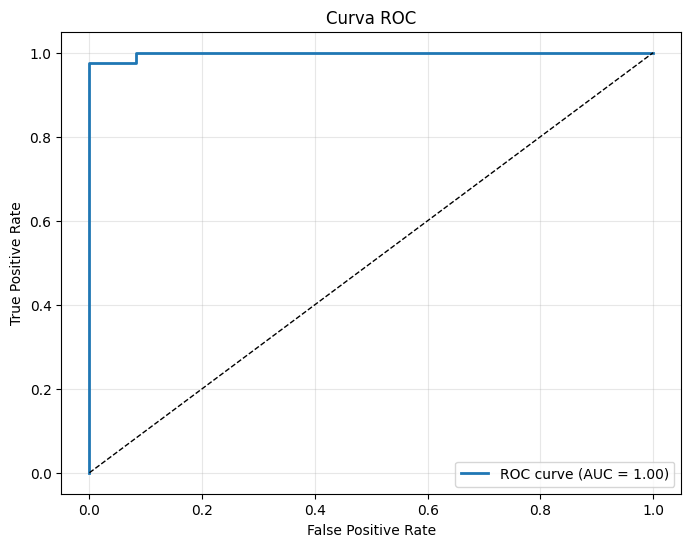

In [22]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Reporte de clasificación:\n", classification_rep)
print("Matriz de confusión:\n", conf_matrix)
print("AUC de la curva ROC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Serializar modelo

In [47]:
model_path = "best_logistic_model.joblib"
joblib.dump(best_model, model_path)

print(f"Modelo guardado en: {model_path}")

Modelo guardado en: best_logistic_model.joblib
